In [96]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

## Exercise  1

In [5]:
from vega_datasets import data
data.sf_temps().head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df_temp = data.sf_temps()
df_temp.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [7]:
df_temp.date = pd.to_datetime(df_temp.date)
df_temp.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
daily_temp = df_temp.set_index('date').resample('D').mean()
daily_temp.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

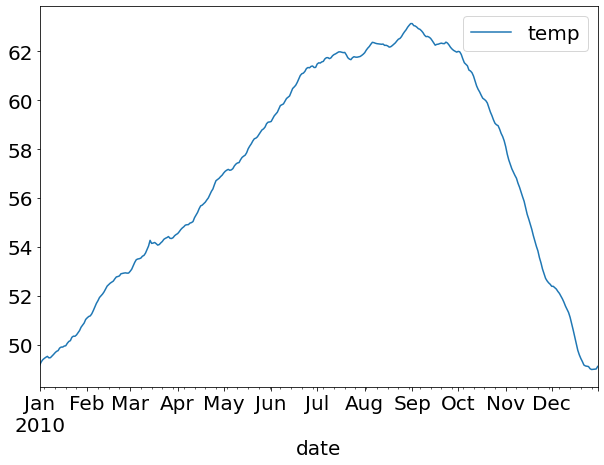

In [97]:
daily_temp.plot.line()

2. Write the code necessary to visualize the minimum temperature over time.

In [20]:
daily_temp_min = df_temp.set_index('date').resample('D').min()
daily_temp_min.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

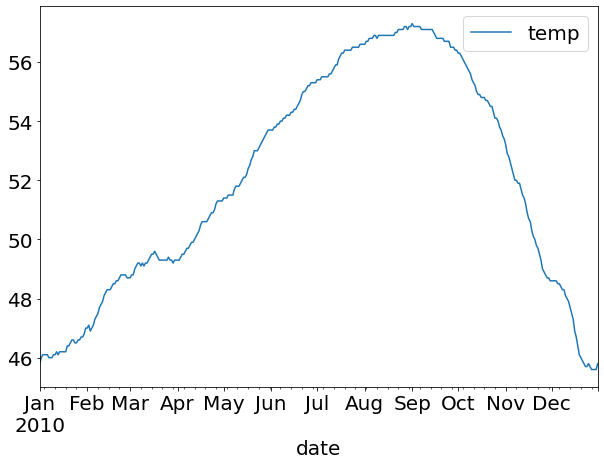

In [98]:
daily_temp_min.plot.line()

3. Write the code necessary to visualize the maximum temperature over time.

In [23]:
daily_temp_max = df_temp.set_index('date').resample('D').max()
daily_temp_max.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

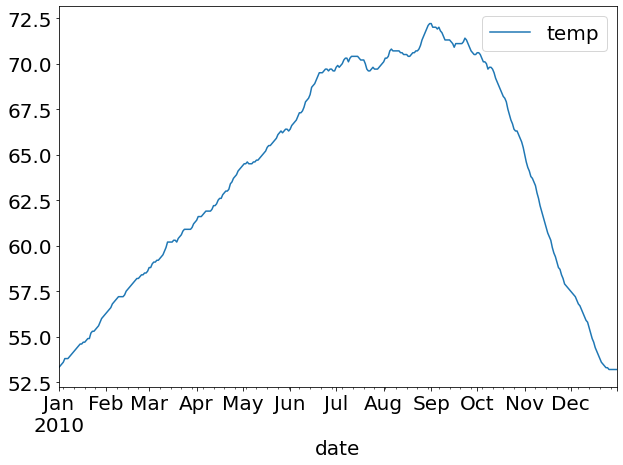

In [99]:
daily_temp_max.plot.line()

4. Which month is the coldest, on average?

In [30]:
monthly_temp = df_temp.set_index('date').resample('M').mean()
monthly_temp.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [31]:
coldest_month = monthly_temp[monthly_temp.temp == (monthly_temp.temp.min())]
coldest_month

,temp
date,
2010-01-31,49.98414


5. Which month has the highest average temperature?

In [33]:
hottest_month = monthly_temp[monthly_temp.temp == (monthly_temp.temp.max())]
hottest_month

,temp
date,
2010-09-30,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [62]:
df_temp_min_max = df_temp.set_index('date').resample('D').temp.agg(['min', 'max'])
df_temp_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [ ]:
# calculate daily change

In [65]:
df_temp_min_max['diffierence'] = df_temp_min_max['max'] - df_temp_min_max['min']
df_temp_min_max.head()

,min,max,diffierence
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [69]:
highest_diff_month = df_temp_min_max[df_temp_min_max.diffierence == (df_temp_min_max.diffierence.max())]
highest_diff_month

,min,max,diffierence
date,,,
2010-08-31,57.2,72.2,15.0


7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

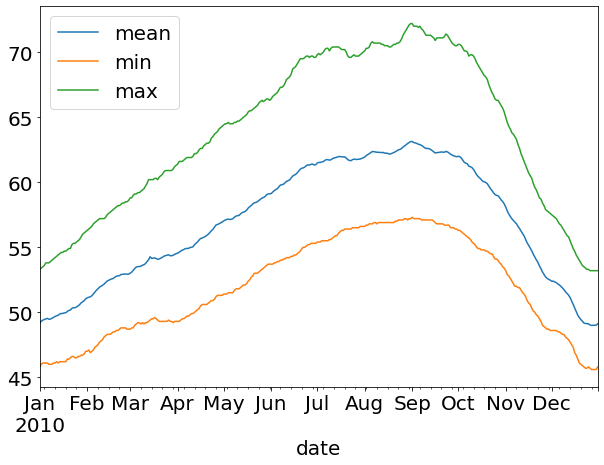

In [100]:
bonus = df_temp.set_index('date').resample('D').temp.agg(['mean','min', 'max'])
bonus.plot.line()

## Exercise 2

In [73]:
from vega_datasets import data
data.seattle_weather().head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Use the dataset to answer the following questions:

* Which year and month combination has the highest amount of precipitation?


In [224]:
df_weather = data.seattle_weather()
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [215]:
df_weather.date = pd.to_datetime(df_weather.date)

In [171]:
# df_weather = df_weather.set_index('date')

In [192]:
df_weather.shape

(1461, 6)

In [193]:
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [194]:
monthly_weather_precipitation = df_weather.set_index('date').resample('M').precipitation.mean()
monthly_weather_precipitation = pd.DataFrame(monthly_weather_precipitation)
monthly_weather_precipitation.head()

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871


In [177]:
highest_precipitation = monthly_weather_precipitation[monthly_weather_precipitation.precipitation == (monthly_weather_precipitation.precipitation.max())]
highest_precipitation

,precipitation
date,
2015-12-31,9.177419


* Visualize the amount of monthly precipitation over time.

In [178]:
monthly_weather_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2012-01-31 to 2015-12-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [179]:
monthly_weather_precipitation.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [180]:
monthly_weather_precipitation.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date')

In [181]:
monthly_weather_precipitation['month'] = monthly_weather_precipitation.index.month
monthly_weather_precipitation.head()

,precipitation,month
date,,
2012-01-31,5.590323,1
2012-02-29,3.182759,2
2012-03-31,5.903226,3
2012-04-30,2.270000,4
2012-05-31,1.683871,5


In [182]:
monthly_weather_precipitation.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            2015, 2015, 2015, 2015],
           dtype='int64', name='date')

In [305]:
monthly_weather_precipitation['year'] = monthly_weather_precipitation.index.year
monthly_weather_precipitation.head()

,precipitation,year
date,,
2012-01-31,5.590323,2012
2012-02-29,3.182759,2012
2012-03-31,5.903226,2012
2012-04-30,2.270000,2012
2012-05-31,1.683871,2012


<AxesSubplot:xlabel='month', ylabel='precipitation'>

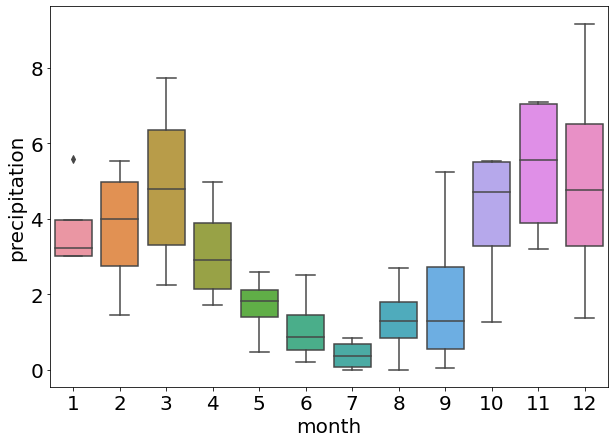

In [187]:
sns.boxplot(data = monthly_weather_precipitation, x ='month', y = 'precipitation')

* Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [195]:
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [201]:
monthly_wind = df_weather.set_index('date').resample('M').wind.mean()
monthly_wind = pd.DataFrame(monthly_wind)
monthly_wind.head()

,wind
date,
2012-01-31,3.900000
2012-02-29,3.903448
2012-03-31,4.248387
2012-04-30,3.373333
2012-05-31,3.354839


<AxesSubplot:xlabel='date'>

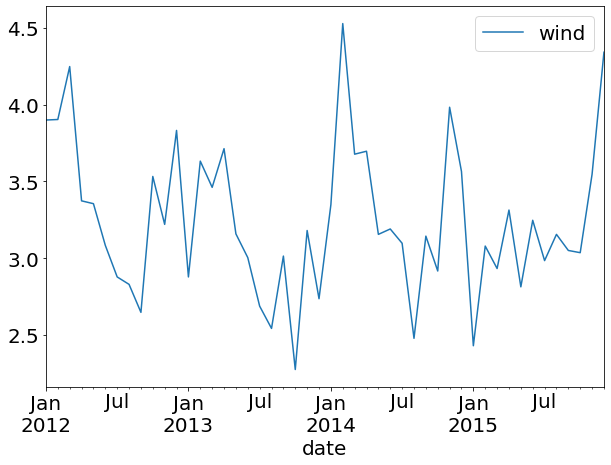

In [202]:
monthly_wind.plot.line()

* Which year-month combination is the windiest?

In [203]:
windest_month = monthly_wind[monthly_wind.wind == (monthly_wind.wind.max())]
windest_month

,wind
date,
2014-02-28,4.528571


* What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [216]:
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [227]:
df_weather['year'] = df_weather.date.dt.year
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [218]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 80.0+ KB


In [219]:
df_weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [230]:
df_weather_dummy = pd.get_dummies(df_weather, columns=['weather'])
df_weather_dummy.head()

,date,precipitation,temp_max,temp_min,wind,year,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,2012,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,2012,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,2012,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,2012,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,2012,0,0,1,0,0


In [232]:
df_weather_dummy.groupby('year').weather_sun.sum()

year
2012    118
2013    205
2014    211
2015    180
Name: weather_sun, dtype: uint8

* 2014 is the sunnist year

* In which month does it rain the most?

In [237]:
df_weather_dummy.head()

,date,precipitation,temp_max,temp_min,wind,year,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,2012,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,2012,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,2012,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,2012,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,2012,0,0,1,0,0


In [238]:
df_weather_dummy.year.value_counts()

2012    366
2013    365
2014    365
2015    365
Name: year, dtype: int64

In [239]:
monthly_rain = df_weather_dummy.set_index('date').resample('M').weather_rain.sum()
monthly_rain = pd.DataFrame(monthly_rain)
monthly_rain.head()

,weather_rain
date,
2012-01-31,18
2012-02-29,17
2012-03-31,19
2012-04-30,19
2012-05-31,16


In [241]:
monthly_rain[monthly_rain.weather_rain == (monthly_rain.weather_rain.max())]

,weather_rain
date,
2012-11-30,25


* Which month has the most number of days with a non-zero amount of precipitation?

In [242]:
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [243]:
df_weather['non_p'] = df_weather['precipitation'] != 0
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,non_p
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,False
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,True
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,True
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,True
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,True


In [244]:
df_weather = pd.get_dummies(df_weather, columns=['non_p'])
df_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,non_p_False,non_p_True
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,0,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,0,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,0,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,0,1


In [246]:
monthly_non_p = df_weather.set_index('date').resample('M').non_p_True.sum()
monthly_non_p = pd.DataFrame(monthly_non_p)
monthly_non_p.head()

,non_p_True
date,
2012-01-31,22
2012-02-29,19
2012-03-31,22
2012-04-30,17
2012-05-31,10


In [248]:
monthly_non_p[monthly_non_p.non_p_True == (monthly_non_p.non_p_True.max())]

,non_p_True
date,
2012-12-31,27


## Exercise 3

In [270]:
df_flight = data.flights_20k()
df_flight.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


* Convert any negative delays to 0.

In [273]:
delay_adjusted = df_flight.delay.clip(lower=0)

In [274]:
df_flight['delay_adjusted'] = delay_adjusted

In [304]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            20000 non-null  datetime64[ns]
 1   delay           20000 non-null  int64         
 2   distance        20000 non-null  int64         
 3   origin          20000 non-null  object        
 4   destination     20000 non-null  object        
 5   delay_adjusted  20000 non-null  int64         
 6   hour            20000 non-null  int64         
 7   weekday_number  20000 non-null  int64         
 8   month           20000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1.4+ MB


* Which hour of the day has the highest average delay?

In [278]:
df_flight['hour'] = df_flight.date.dt.hour
df_flight.head()

,date,delay,distance,origin,destination,delay_adjusted,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,32,14
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,0,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,3,18
3,2001-01-10 21:00:00,-15,550,MSY,MCO,0,21
4,2001-03-30 21:45:00,-2,229,STL,IND,0,21


In [294]:
df_flight.groupby('hour').delay_adjusted.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay_adjusted, dtype: float64

* Does the day of the week make a difference in the delay amount?

In [291]:
df_flight['weekday_number'] = df_flight.set_index('date').index.day_of_week
df_flight.head()

,date,delay,distance,origin,destination,delay_adjusted,hour,weekday_number
0,2001-01-13 14:56:00,32,417,SAN,SJC,32,14,5
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,0,16,2
2,2001-02-11 18:39:00,3,293,LBB,DAL,3,18,6
3,2001-01-10 21:00:00,-15,550,MSY,MCO,0,21,2
4,2001-03-30 21:45:00,-2,229,STL,IND,0,21,4


In [295]:
df_flight.groupby('weekday_number').delay_adjusted.mean()

weekday_number
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay_adjusted, dtype: float64

* Does the month make a difference in the delay amount?

In [293]:
df_flight['month'] = df_flight.set_index('date').index.month
df_flight.head()

,date,delay,distance,origin,destination,delay_adjusted,hour,weekday_number,month
0,2001-01-13 14:56:00,32,417,SAN,SJC,32,14,5,1
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,0,16,2,1
2,2001-02-11 18:39:00,3,293,LBB,DAL,3,18,6,2
3,2001-01-10 21:00:00,-15,550,MSY,MCO,0,21,2,1
4,2001-03-30 21:45:00,-2,229,STL,IND,0,21,4,3


In [296]:
df_flight.groupby('month').delay_adjusted.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay_adjusted, dtype: float64

In [298]:
df_flight.month.value_counts()

3    6960
1    6784
2    6256
Name: month, dtype: int64

## Bonus

In [335]:
from vega_datasets import data
df_electricity = data.iowa_electricity()
df_electricity.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


* For each row, calculate the percentage of the year's total that energy source provided.

In [301]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [336]:
df_electricity['yearly'] = df_electricity.set_index('year').index.year
df_electricity.head()

,year,source,net_generation,yearly
0,2001-01-01,Fossil Fuels,35361,2001
1,2002-01-01,Fossil Fuels,35991,2002
2,2003-01-01,Fossil Fuels,36234,2003
3,2004-01-01,Fossil Fuels,36205,2004
4,2005-01-01,Fossil Fuels,36883,2005


In [329]:
year_total = df_electricity.groupby('yearly').sum()
year_total.head()

,net_generation
yearly,
2001,40651
2002,42528
2003,42107
2004,43236
2005,44145


In [337]:
df_electricity = df_electricity.merge(year_total, how="left", on="yearly")
df_electricity.head()

,year,source,net_generation_x,yearly,net_generation_y
0,2001-01-01,Fossil Fuels,35361,2001,40651
1,2002-01-01,Fossil Fuels,35991,2002,42528
2,2003-01-01,Fossil Fuels,36234,2003,42107
3,2004-01-01,Fossil Fuels,36205,2004,43236
4,2005-01-01,Fossil Fuels,36883,2005,44145


In [338]:
df_electricity['year_percentage'] = df_electricity.net_generation_x / df_electricity.net_generation_y
df_electricity.head()

,year,source,net_generation_x,yearly,net_generation_y,year_percentage
0,2001-01-01,Fossil Fuels,35361,2001,40651,0.869868
1,2002-01-01,Fossil Fuels,35991,2002,42528,0.846290
2,2003-01-01,Fossil Fuels,36234,2003,42107,0.860522
3,2004-01-01,Fossil Fuels,36205,2004,43236,0.837381
4,2005-01-01,Fossil Fuels,36883,2005,44145,0.835497


* Lineplot of generation over time, color by source

<AxesSubplot:xlabel='year', ylabel='net_generation_x'>

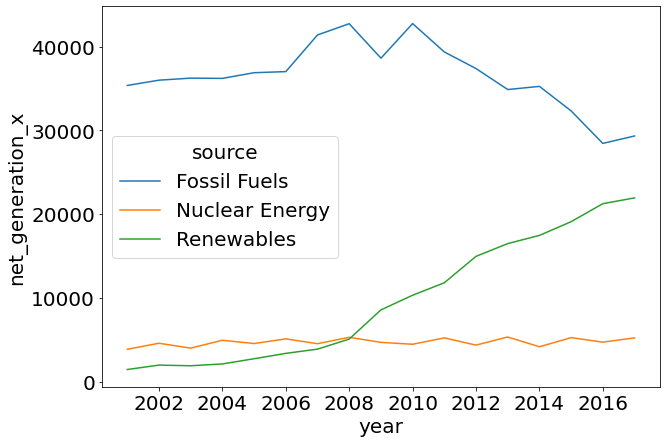

In [341]:
sns.lineplot(data = df_electricity, x = 'year', y = 'net_generation_x',  hue = 'source')

* Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)